In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import StratifiedShuffleSplit

data= fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554

In [2]:
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
targetNumber = 1
dfData["target"] = dfData["target"].apply(lambda x: 1 if int(x) == targetNumber else 0)

In [3]:
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [4]:
from sklearn.linear_model import LogisticRegression
logReg_clf = LogisticRegression()
logReg_clf.fit(X_train, y_train)

y_test_pred = logReg_clf.predict(X_test)

/Users/maxschallwig/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
#Accuracy
print("Accuracy:",round(logReg_clf.score(X_test,y_test),2))
#Be careful when doing binary classification
print("% of",targetNumber,"in y_test",str(round(y_test.value_counts()[1]/y_test.count()*100,2))+"%")

Accuracy: 0.99
% of 1 in y_test 11.25%


In [6]:
from sklearn.metrics import precision_recall_fscore_support

labels = list(set(y_test))
labels.sort()
targetLabelInd = labels.index(targetNumber)#[0,1,2,3,4,5,6,..]
precision,recall,fscore,support = precision_recall_fscore_support(y_true=y_test, y_pred=y_test_pred)
print("precision:",np.round(precision,2)[targetLabelInd])
print("recall:",np.round(recall,2)[targetLabelInd])
print("fscore:",np.round(fscore,2)[targetLabelInd])
print("support:",support)

precision: 0.96
recall: 0.96
fscore: 0.96
support: [12425  1575]


In [7]:
(y_test==targetNumber).sum()

1575

In [8]:
from sklearn.metrics import precision_recall_curve
yRawScores = logReg_clf.decision_function(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, yRawScores)

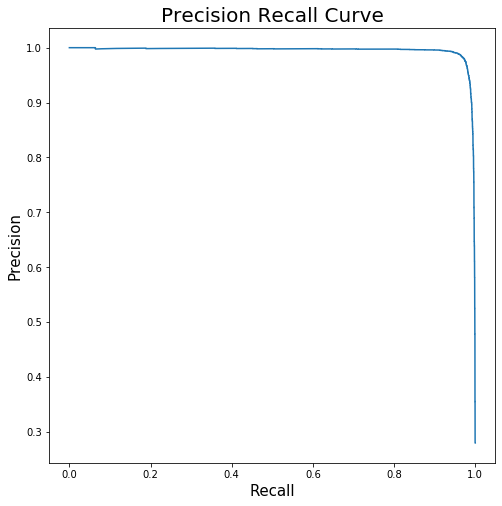

In [9]:
plt.figure(figsize=(8,8))
plt.plot(recalls,precisions)
plt.xlabel("Recall",fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.title("Precision Recall Curve",fontsize=20)
plt.show()

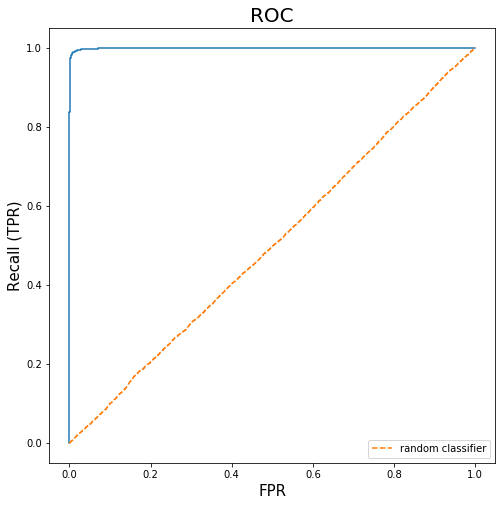

In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, yRawScores)
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel("FPR",fontsize=15)
plt.ylabel("Recall (TPR)",fontsize=15)
plt.title("ROC",fontsize=20)

randomAssignment = np.random.normal(size=len(y_train))
fprRand, tprRand, thresholdsRand = roc_curve(y_train, randomAssignment)
plt.plot(fprRand,tprRand,ls="--",label="random classifier")
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test,y_pred=y_test_pred,labels=[0,1]))
pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=y_test_pred,labels=[0,1]),
             columns = ["Pred not "+str(targetNumber),"Pred "+str(targetNumber)],
            index = ["not "+str(targetNumber),str(targetNumber)])

[[12360    65]
 [   56  1519]]


,Pred not 1,Pred 1
not 1,12360,65
1,56,1519


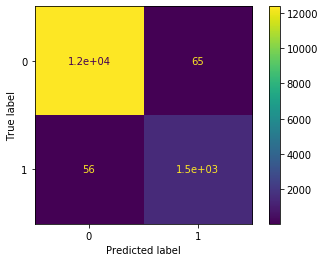

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logReg_clf,X_test,y_test)